In [17]:
#IMPORTACIÓN DE TODAS LAS LIBRERÍAS NECESARIAS
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbn

In [18]:
#INICIALIZACIÓN DE ALGUNAS VARIABLES
hostnames = []
dataset = []
df = None

In [19]:
#CREACIÓN HOSTNAMES EN BASE A ALGUNAS REGLAS
def set_hostnames(number_of_hosts: int) -> None:
    sistema_operativo = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1 #40% Linux, 30% Solaris, 20% AIX, 10% HP-UX
    entorno = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30 #10% Development, 10% Integration, 25% Testing, 25% Staging, 30% Production
    pais = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRE']*30 #6% Noruega, 9% Francia, 16% Italia, 16% España, 23% Alemania, 30% Irlanda
    grupo_alpha = []
    
    for i in range(number_of_hosts):
        hostname = random.choice(sistema_operativo) + random.choice(entorno) + random.choice(pais)
        grupo_alpha.append(hostname)
        hostname += str(grupo_alpha.count(hostname)).zfill(3)
        hostnames.append(hostname)
    

In [20]:
#FUNCIÓN PARA OBTENER SO
def get_os(hostname: str) -> str: 
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else: 
        return 'Unknown'

In [21]:
#FUNCIÓN PARA OBTENER ENTORNO
def get_enviroment(hostname: str) -> str: 
    if hostname[1] == 'D':
        return 'Development'
    elif hostname [1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname [1] == 'S':
        return 'Staging'
    elif hostname [1] == 'P':
        return 'Production'
    else: 
        return 'Unknown'

In [22]:
#FUNCIÓN PARA OBTENER PAÍS
def get_country(hostname: str) -> str: 
    if hostname[2:5] == 'NOR':
        return 'Norway'
    elif hostname [2:5] == 'FRA':
        return 'France'
    elif hostname [2:5] == 'ITA':
        return 'Italy'
    elif hostname [2:5] == 'ESP':
        return 'Spain'
    elif hostname [2:5] == 'DEU':
        return 'Germany'
    elif hostname [2:5] == 'IRE':
        return 'Ireland'
    else:
        return 'Unknown'

In [23]:
#FUNCIÓN PARA CREAR DATAFRAME
def set_dataframe(count: int) -> None:
    global df 
    
    set_hostnames(count)
    
    for hostname in hostnames:
        dataset.append({
            'hostname' : hostname,
            'os' : get_os(hostname),
            'enviroment' : get_enviroment(hostname),
            'country' : get_country(hostname),
            'node' : int(hostname[-3:])
        })
        
    df = pd.DataFrame(dataset)

In [24]:
set_dataframe(1500)

In [25]:
#GUARDAR DATAFRAME COMO CSV
df.to_csv('hosts.csv', 
          header = True, 
          index = False)

In [26]:
hosts_df = pd.read_csv('hosts.csv')
hosts_df

,hostname,os,enviroment,country,node
0,SSIRE001,Solaris,Staging,Ireland,1
1,LTIRE001,Linux,Testing,Ireland,1
2,AIDEU001,AIX,Integration,Germany,1
3,LPITA001,Linux,Production,Italy,1
4,SPITA001,Solaris,Production,Italy,1
...,...,...,...,...,...
1495,LTITA026,Linux,Testing,Italy,26
1496,SSITA024,Solaris,Staging,Italy,24
1497,SSNOR005,Solaris,Staging,Norway,5
1498,STESP021,Solaris,Testing,Spain,21


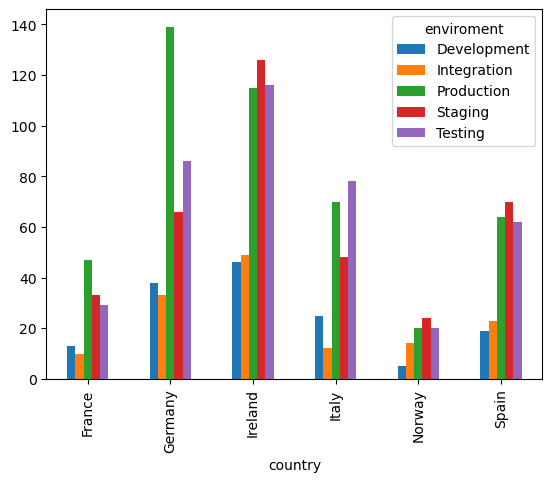

In [27]:
#GRÁFICO AGRUPANDO POR CADA PAÍS SU ENTORNO
h = hosts_df
h_ent = h.groupby(['country', h['enviroment']]).size()
h_ent.unstack().plot(kind='bar')
plt.show()

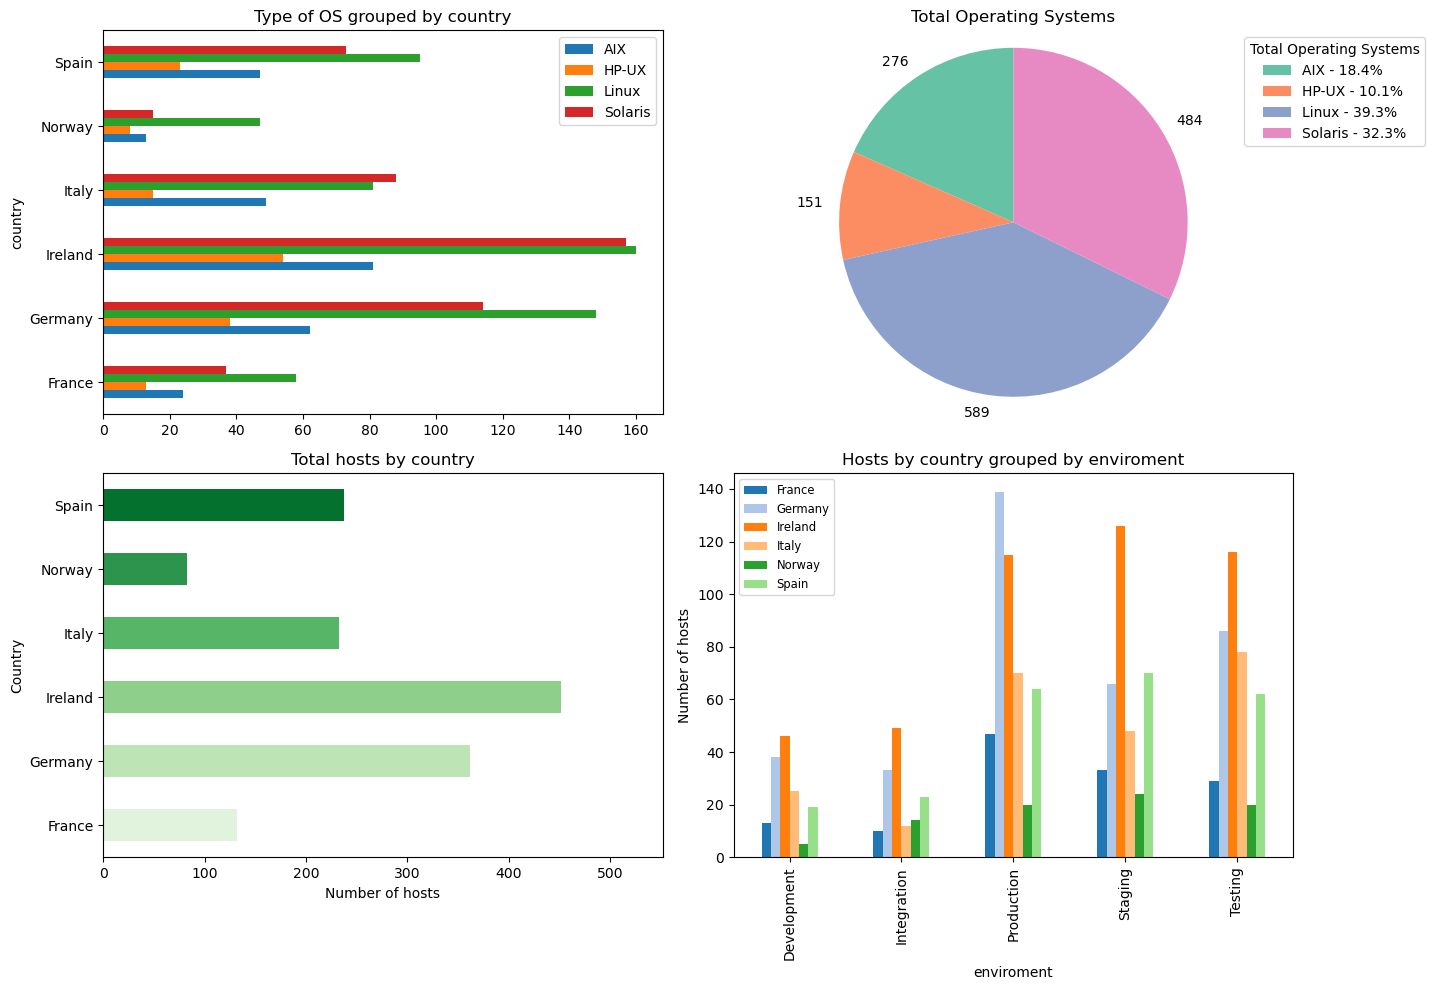

In [62]:
#GENERAR 4 GRÁFICOS EN UNA MALLA
h = hosts_df
fig, axs = plt.subplots(2,2, figsize=(15, 15))
fig.set_size_inches(14.5, 10)

#PRIMER GRÁFICO
h.groupby(['country', h['os']]).size().unstack().plot(kind='barh', ax=axs[0,0])
axs[0, 0].legend(loc='upper right')
axs [0,0].set_title('Type of OS grouped by country')


#SEGUNDO GRÁFICO
h_sist = h.groupby(['os']).size() 
wedges, texts = axs[0,1].pie(h_sist, labels=h_sist, startangle=90, colors=sbn.color_palette('Set2'))
legend_labels = ['{} - {}'.format(index, perc) for index, perc in zip(h_sist.index, (h_sist / h_sist.sum() * 100).round(1).astype(str) + '%')]
axs[0,1].legend(wedges, legend_labels, title='Total Operating Systems',loc='upper left', bbox_to_anchor=(0.9, 1))
axs[0,1].axis('equal')
axs[0,1].set_title('Total Operating Systems')

#TERCER GRÁFICO
h_total = h.groupby('country')['hostname'].value_counts().groupby('country').count()
h_total.plot(kind = 'barh', ax =axs[1,0], color=sbn.color_palette("Greens", n_colors=len(h_total)))
axs [1,0].set_title('Total hosts by country')
axs[1,0].set_xlabel('Number of hosts')
axs[1,0].set_ylabel('Country')  
axs[1,0].set_xlim(0, h_total[h_total.idxmax()]+100)

#CUARTO GRÁFICO 
h_ent.unstack(0).plot(kind='bar', ax=axs[1,1], color=sbn.color_palette("tab20"))
axs[1, 1].legend(fontsize='small')
axs[1,1].set_ylabel('Number of hosts')
axs[1,1].set_title('Hosts by country grouped by enviroment')

fig.tight_layout()
plt.show()